In [79]:
# Importations de bibliothèques 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.ensemble import RandomForestClassifier
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import style


from sklearn.preprocessing import MinMaxScaler

# compute minimum and maximum on the training data
#scaler = MinMaxScaler().fit(X_train)
style.use('ggplot')

from sklearn.pipeline import Pipeline
pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC())])

# Visualisation


In [113]:
# Extraite les données du CSV
df = pd.read_csv('heart.csv')
# Affichage des 5 premières valeurs
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [23]:
# Information générale
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [24]:
# Description générale des données
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# Data Cleaning

Utilisation de one hot encoding pour plus de précision dans les résultats (pas de discrimination qui introduirait un biai) et que des int.

__A améliorer : réduire la modification au maximum__

In [133]:
# Création d'un data Frame nettoyé
df_clean = df

# Sex
a = pd.get_dummies(df_clean.Sex, prefix='sex')
df_clean=df_clean.assign(sex_F=a['sex_F'], sex_M = a['sex_M'])

# 
a = pd.get_dummies(df_clean.ChestPainType, prefix='ChestPainType')
df_clean=df_clean.assign(ChestPainType_ATA=a['ChestPainType_ATA'], ChestPainType_NAP = a['ChestPainType_NAP'], ChestPainType_ASY = a['ChestPainType_ASY'], ChestPainType_TA = a['ChestPainType_TA'])

# RestingBS
a = pd.get_dummies(df_clean.RestingECG, prefix='RestingECG')
df_clean=df_clean.assign(RestingECG_Normal=a['RestingECG_Normal'], RestingECG_ST = a['RestingECG_ST'], RestingECG_LVH = a['RestingECG_LVH'])

# ExerciceAngina
a = pd.get_dummies(df_clean.ExerciseAngina, prefix='ExerciseAngina')
df_clean=df_clean.assign(ExerciseAngina_Y=a['ExerciseAngina_Y'], ExerciseAngina_N = a['ExerciseAngina_N'])

# ST_Slope
a = pd.get_dummies(df_clean.ST_Slope, prefix='ST_Slope')
df_clean=df_clean.assign(ST_Slope_Up=a['ST_Slope_Up'], ST_Slope_Flat = a['ST_Slope_Flat'], ST_Slope_Down = a['ST_Slope_Down'])

df_clean = df_clean.drop(["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"], axis = 1)
df_clean.head()

"""
#Truc moche et inutile, préférer le version du dessus.

# Sex
df_clean = df_clean.replace(to_replace ="M", value ="1")
df_clean = df_clean.replace(to_replace ="F", value ="0")

# ChestPainType
df_clean = df_clean.replace(to_replace ="ATA", value ="1")
df_clean = df_clean.replace(to_replace ="NAP", value ="2")
df_clean = df_clean.replace(to_replace ="ASY", value ="3")
df_clean = df_clean.replace(to_replace ="TA", value ="4")
df_clean = df_clean.replace(to_replace ="LVH", value ="5")

# RestingBS
df_clean = df_clean.replace(to_replace ="Normal", value ="0")
df_clean = df_clean.replace(to_replace ="ST", value ="1")

# ExerciceAngina
df_clean = df_clean.replace(to_replace ="Y", value ="1")
df_clean = df_clean.replace(to_replace ="N", value ="2")

# ST_Slope
df_clean = df_clean.replace(to_replace ="Up", value ="1")
df_clean = df_clean.replace(to_replace ="Flat", value ="2")
df_clean = df_clean.replace(to_replace ="Down", value ="3")

df_clean = df_clean.astype('int64')
df_clean.info()"""

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,sex_F,sex_M,ChestPainType_ATA,...,ChestPainType_ASY,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,RestingECG_LVH,ExerciseAngina_Y,ExerciseAngina_N,ST_Slope_Up,ST_Slope_Flat,ST_Slope_Down
0,40,140,289,0,172,0.0,0,0,1,1,...,0,0,1,0,0,0,1,1,0,0
1,49,160,180,0,156,1.0,1,1,0,0,...,0,0,1,0,0,0,1,0,1,0
2,37,130,283,0,98,0.0,0,0,1,1,...,0,0,0,1,0,0,1,1,0,0
3,48,138,214,0,108,1.5,1,1,0,0,...,1,0,1,0,0,1,0,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,0,0,1,0,0,0,1,1,0,0


In [142]:
# Target
y = df_clean['HeartDisease']
# Features
X = df_clean.drop(['HeartDisease'], axis=1)
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,sex_F,sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_ASY,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,RestingECG_LVH,ExerciseAngina_Y,ExerciseAngina_N,ST_Slope_Up,ST_Slope_Flat,ST_Slope_Down
0,40,140,289,0,172,0.0,0,1,1,0,0,0,1,0,0,0,1,1,0,0
1,49,160,180,0,156,1.0,1,0,0,1,0,0,1,0,0,0,1,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,0,1,0,0,1,1,0,0
3,48,138,214,0,108,1.5,1,0,0,0,1,0,1,0,0,1,0,0,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,0,1,0,0,0,1,1,0,0


In [143]:
# Découpe 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=109)

# Machine Learning 

Target (y) = HeartDisease

Feature (X) = le reste


## SVM

Fini, possible d'améliorer

In [144]:
# Création du SVM Classifier
ml = svm.SVC(kernel='linear',) # Linear Kernel

# Utilisation des données d'entrainement dans le modèle
ml.fit(X_train, y_train)

# Tester sur les données dédiées
y_pred = ml.predict(X_test)

In [145]:
# Pourcentage de réponse juste
ml.score(X_test,y_test)

0.8913043478260869

(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

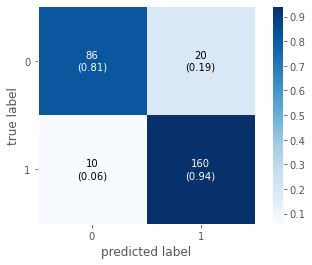

In [146]:
# Matrice de confusion : 33 erreurs sur 276.
conf_mat = metrics.confusion_matrix(y_test, y_pred)
#conf_mat pour afficher la matrice classique

# Matrice de confusion avec seaplot
plot_confusion_matrix(conf_mat=conf_mat,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True)

## Random Forest


In [147]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC())])

In [148]:
from sklearn.ensemble import RandomForestClassifier

param_grid = [
    {'classifier': [SVC()], 'preprocessing': [StandardScaler(), None],
     'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
     'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'classifier': [RandomForestClassifier(n_estimators=100)],
     'preprocessing': [None], 'classifier__max_features': [1, 2, 3]}]

In [151]:
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Best params:
{'classifier': RandomForestClassifier(max_features=2), 'classifier__max_features': 2, 'preprocessing': None}

Best cross-validation score: 0.86
Test-set score: 0.89
